In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import subprocess

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 20

1.  LCG — линейный конгруэнтный метод
2.  LCG2 — комбинация двух линейных конгруэнтных методов
3.  запаздывающий генератор Фибоначчи (lagged Fibonacci generator, lfg)
4.  `xorshift*`
5.  `xorshift+`
6.  `xorshift`
7.  Mersenne Twister
8.  `kiss`
9.  `jkiss`
10. ICG — инверсный конгруэнтный генератор
11. нормальный генератор
12. экспоненциальный генератор
13. генератор распределения Пуассона
14. генератор процесса Винера
15. генератор процесса Пуассона

In [44]:
generator = 11
N = 10**7
λ = (3.0, 6.0, 10.0)
σ = 1.0
μ = 0.0
p1 = λ
p2 = μ
cmd = ['./bin/test', str(generator), str(N), str(σ), str(μ)]

In [45]:
out = subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode().split('\n')
rnd = np.array(out[:-1], dtype=np.float64)

In [147]:
# cmd1 = ['./bin/test', str(generator), str(N), str(p1[0]), str(p2)]
# cmd2 = ['./bin/test', str(generator), str(N), str(p1[1]), str(p2)]
# cmd3 = ['./bin/test', str(generator), str(N), str(p1[2]), str(p2)]

# out1 = subprocess.run(cmd1, stdout=subprocess.PIPE).stdout.decode().split('\n')
# out2 = subprocess.run(cmd2, stdout=subprocess.PIPE).stdout.decode().split('\n')
# out3 = subprocess.run(cmd3, stdout=subprocess.PIPE).stdout.decode().split('\n')

# rnd1 = np.array(out1[:-1], dtype=np.uint64)
# rnd2 = np.array(out2[:-1], dtype=np.uint64)
# rnd3 = np.array(out3[:-1], dtype=np.uint64)

./bin/test 13 10000000 3.0 0.0


In [141]:
T = np.linspace(0.0, 100.0, len(rnd1))

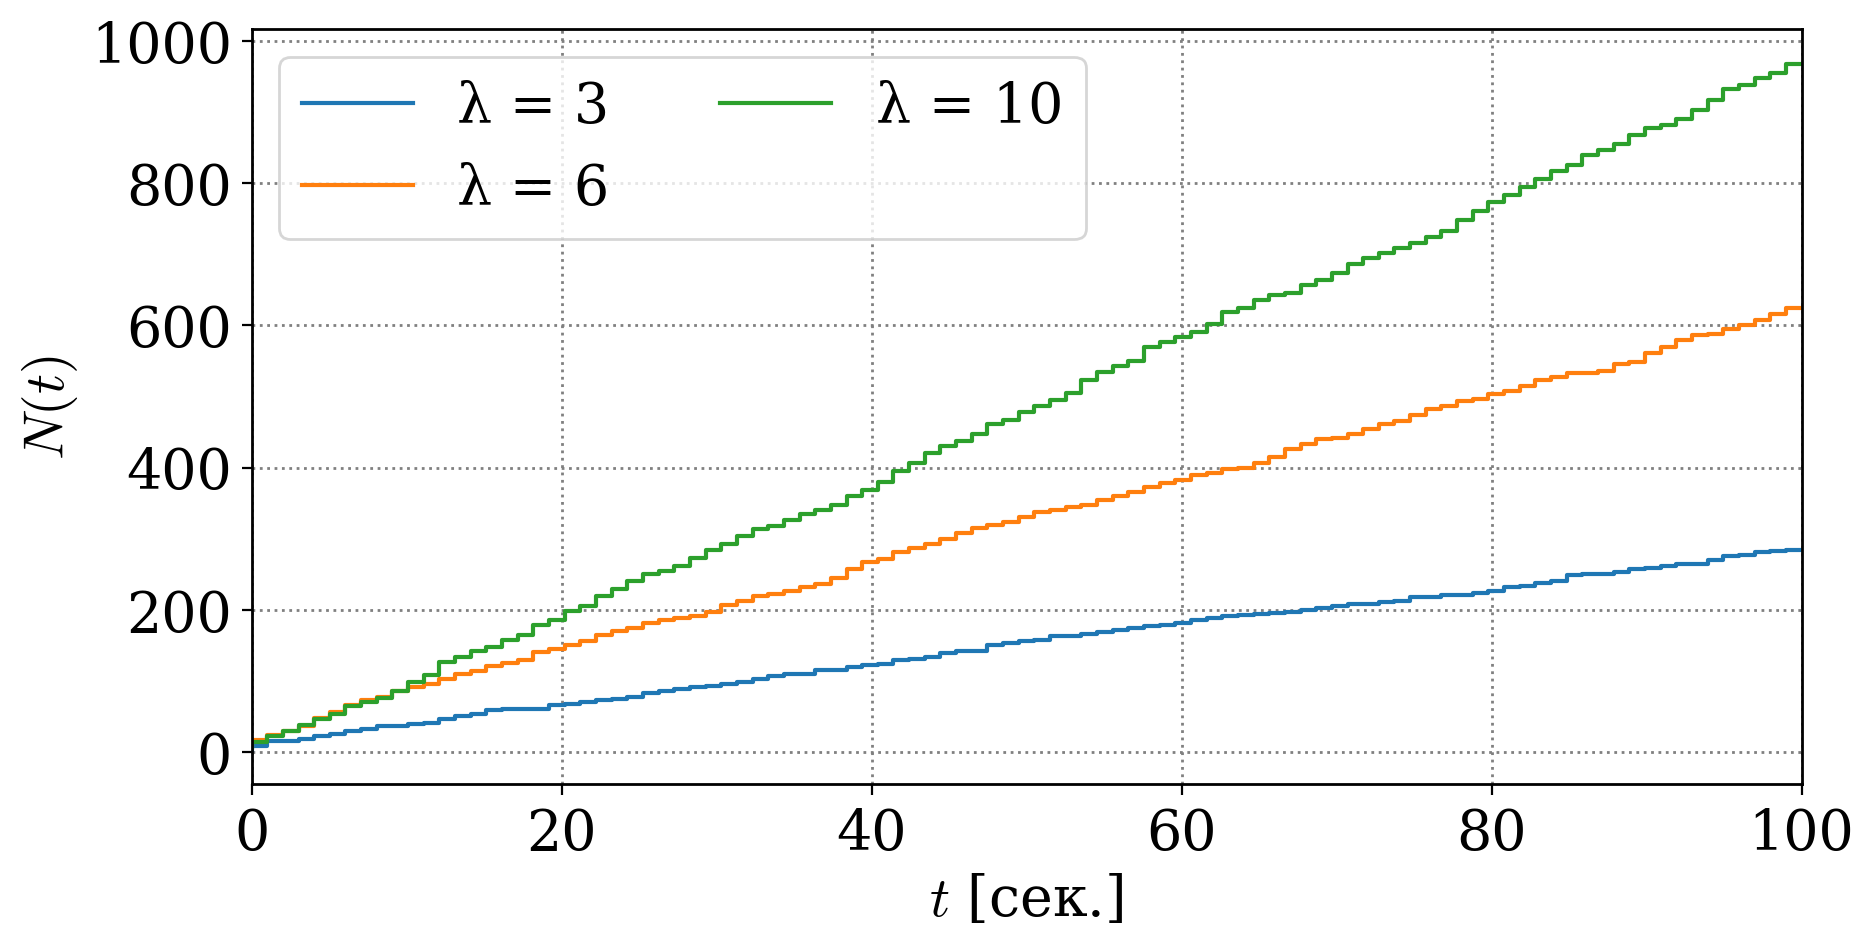

In [142]:
lw = 1.5

fig01 = plt.figure(1, figsize=(10.0, 5.0))
ax01 = fig01.add_subplot(1, 1, 1)

ax01.set_xlabel(r"$t$ [сек.]")
ax01.set_ylabel(r"$N(t)$")

ax01.set_xlim(left=T[0], right=T[-1])

ax01.step(T, rnd1, linewidth=lw, label='λ = {0:.2g}'.format(p1[0]))
ax01.step(T, rnd2, linewidth=lw, label='λ = {0:.2g}'.format(p1[1]))
ax01.step(T, rnd3, linewidth=lw, label='λ = {0:.2g}'.format(p1[2]))

ax01.legend(loc=2, ncol=2)
#ax01.plot(T, rnd, lw=0.5, color="k")

In [143]:
fig01.savefig('Poisson_process_02.png', format='png', bbox_inches='tight', pad_inches=0.0)

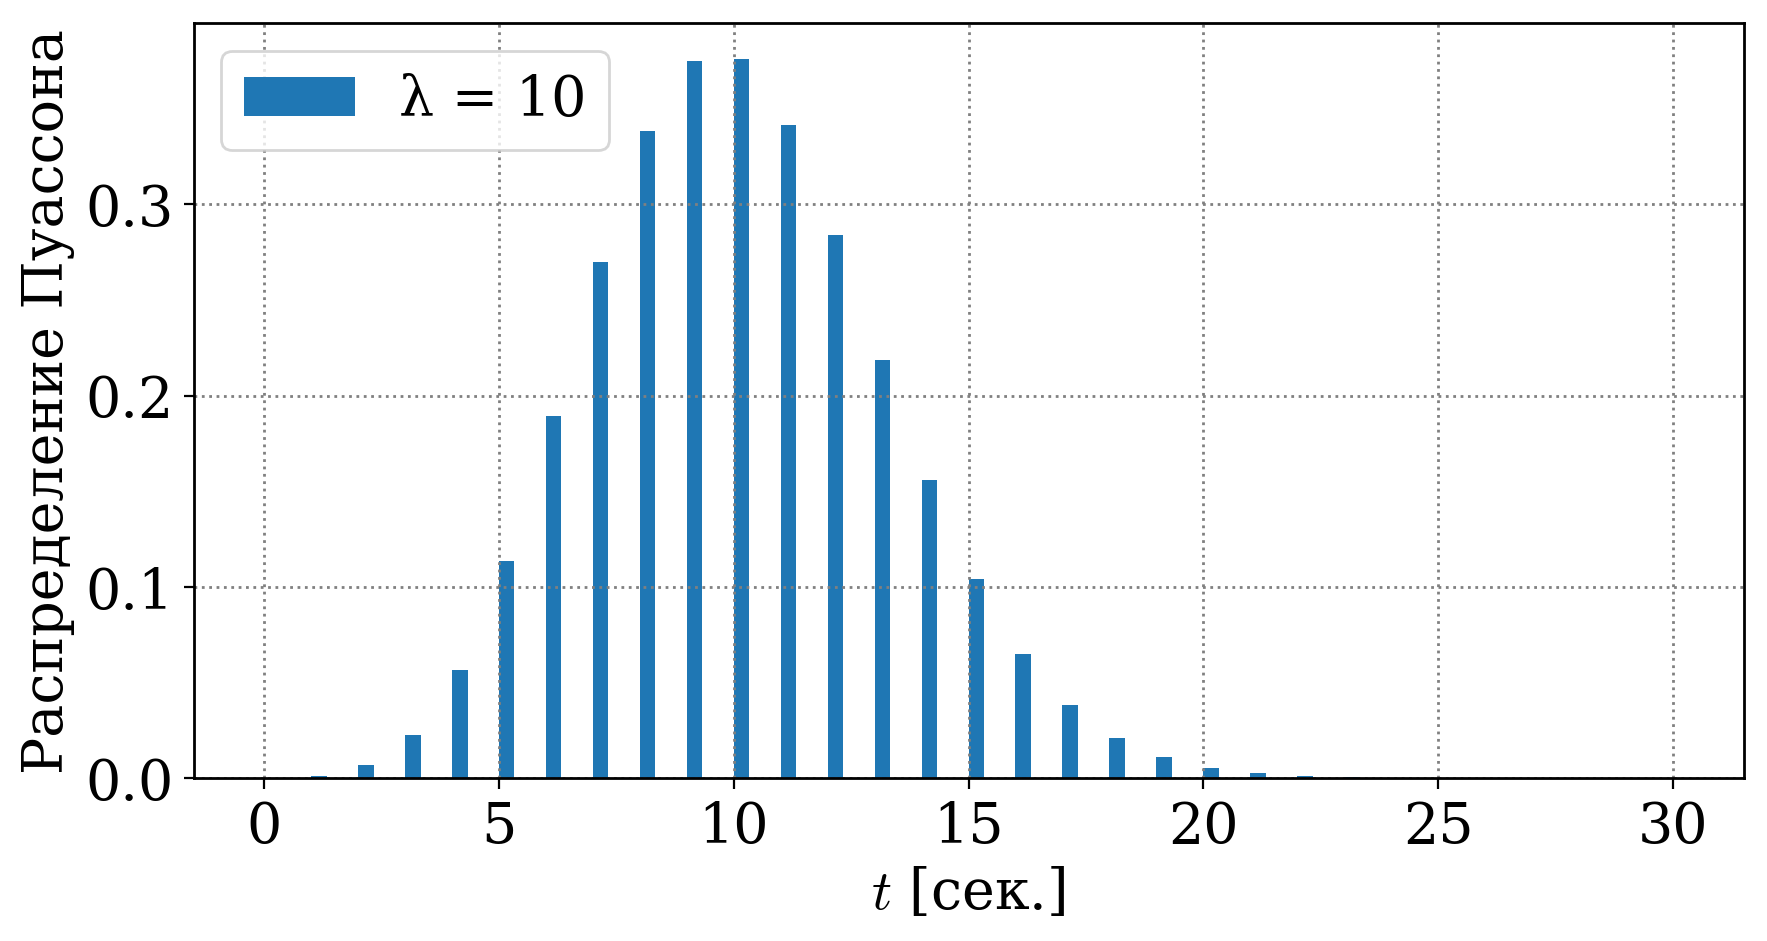

In [171]:
lw = 1.5

fig02 = plt.figure(2, figsize=(10.0, 5.0))
ax02 = fig02.add_subplot(1, 1, 1)

ax02.set_xlabel(r"$t$ [сек.]")
ax02.set_ylabel(r"Распределение Пуассона")

#ax02.hist(rnd1, bins=30, normed=1, histtype='stepfilled', label='λ = {0:.2g}'.format(p1[0]))
#ax02.hist(rnd2, bins=50, normed=1, histtype='stepfilled', label='λ = {0:.2g}'.format(p1[1]))
ax02.hist(rnd3, bins=90, normed=1, histtype='stepfilled', label='λ = {0:.2g}'.format(p1[2]))

ax02.legend(loc=2, ncol=2)
#ax02.plot(T, rnd, lw=0.5, color="k")

In [172]:
fig02.savefig('Poisson_03.png', format='png', bbox_inches='tight', pad_inches=0.0)

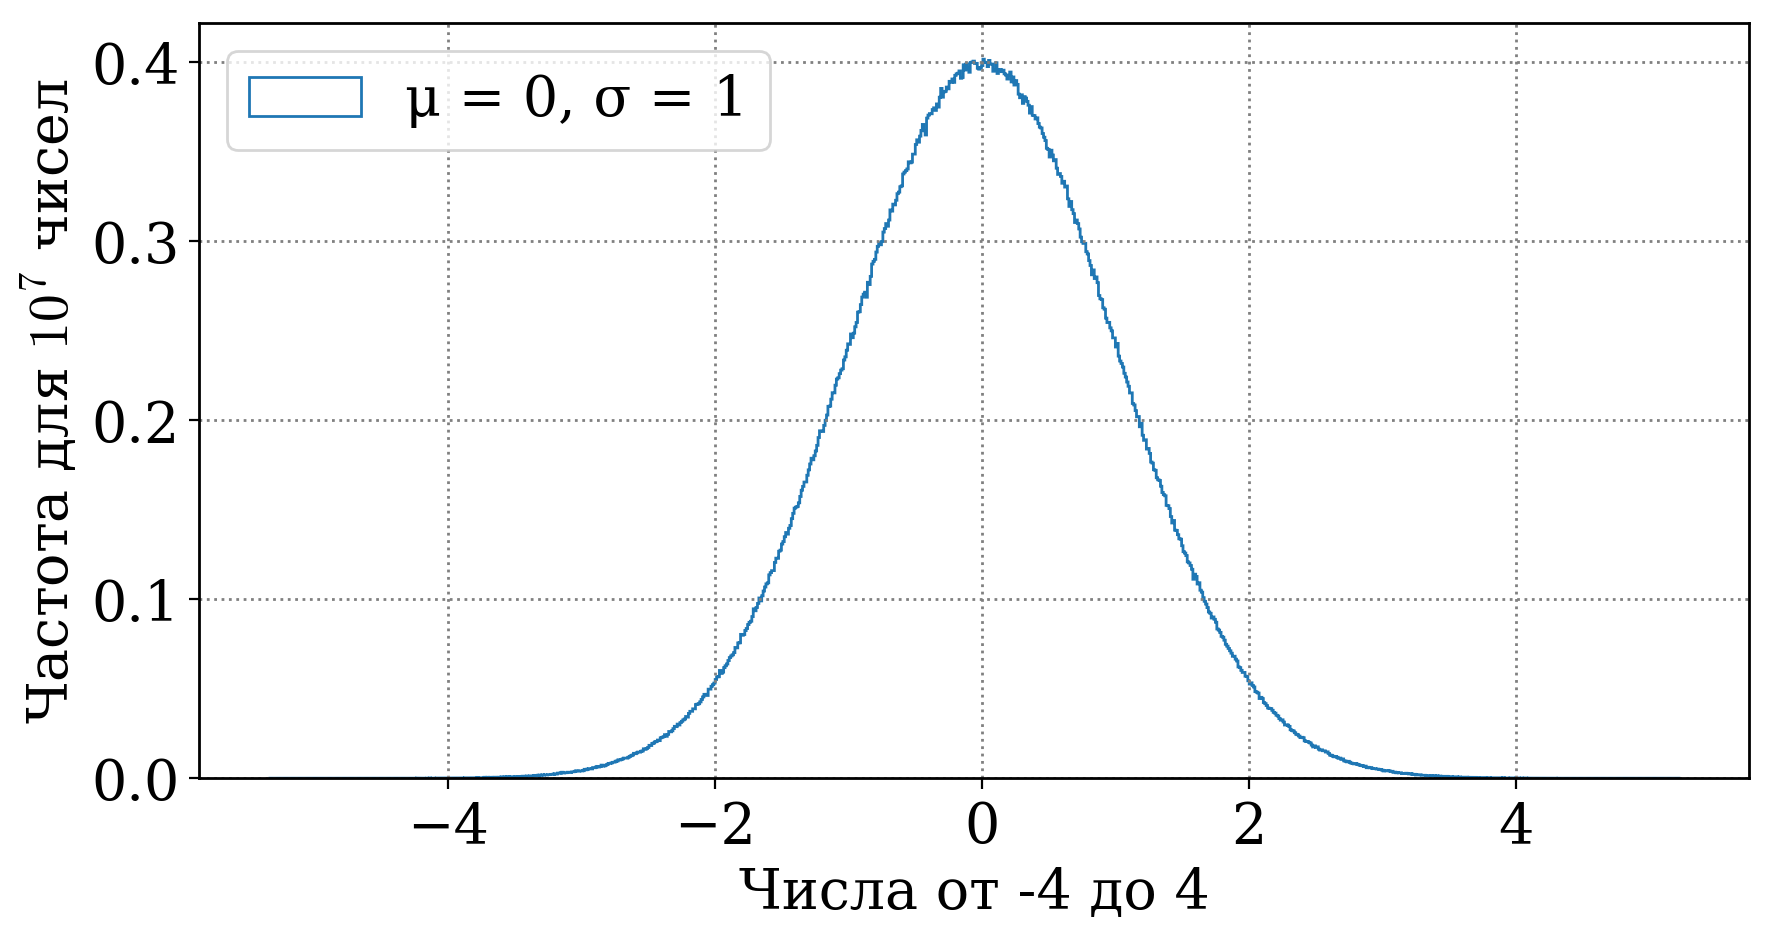

In [46]:
lw = 1.5

fig03 = plt.figure(3, figsize=(10.0, 5.0))
ax03 = fig03.add_subplot(1, 1, 1)

ax03.set_xlabel(r"Числа от -4 до 4")
ax03.set_ylabel(r"Частота для $10^{{{0:d}}}$ чисел".format(int(np.log10(N))))

ax03.hist(rnd, bins=1000, normed=1, histtype='step', label='μ = {0:.2g}, σ = {1:.2g}'.format(μ, σ))

ax03.legend(loc=2, ncol=2)

In [47]:
fig03.savefig('Normal_0{0}.png'.format(int(np.log10(N)) - 3), format='png', bbox_inches='tight', pad_inches=0.0)